In [1]:
# Author: TK, ChatGPT
# Date: 2024-06-15
# Description: reads data from a csvfile and outputs figures.

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (9, 5)

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_PATH = os.path.join(PROJECT_ROOT, "Data", "Titanic-Dataset.csv")
FIG_DIR = os.path.join(PROJECT_ROOT, "output", "figures")

os.makedirs(FIG_DIR, exist_ok=True)

DATA_PATH


'C:\\Users\\theun\\OneDrive\\Desktop\\CU CyberSec\\HS CS\\Python_3 Mod 6\\Intro_to_Python3\\Titanic-survival-eda\\Data\\Titanic-Dataset.csv'

In [2]:
df = pd.read_csv(DATA_PATH) # read data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Shape:", df.shape) 
display(df.info())
display(df.describe(include="all").T)

# Missin values check
missing = df.isna().mean().sort_values(ascending=False) * 100
missing = missing[missing > 0]
missing.to_frame("missing_%")

Shape: (891, 12)
<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


,missing_%
Cabin,77.104377
Age,19.865320
Embarked,0.224467


In [4]:
# Keep original df, create a working copy
data = df.copy()

# Basic cleanup: ensure expected columns exist
expected_cols = ["Survived", "Sex", "Pclass", "Embarked", "Age", "Fare", "SibSp", "Parch"]
missing_cols = [c for c in expected_cols if c not in data.columns]
if missing_cols:
    raise ValueError(f"Dataset missing expected columns: {missing_cols}")

# Handle missing Embarked with mode (common practice)
if data["Embarked"].isna().any():
    data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

# Age: keep NaNs for correlation (pandas handles), but for plotting sometimes fill

data[expected_cols].head()


,Survived,Sex,Pclass,Embarked,Age,Fare,SibSp,Parch
0,0,male,3,S,22.0,7.2500,1,0
1,1,female,1,C,38.0,71.2833,1,0
2,1,female,3,S,26.0,7.9250,0,0
3,1,female,1,S,35.0,53.1000,1,0
4,0,male,3,S,35.0,8.0500,0,0


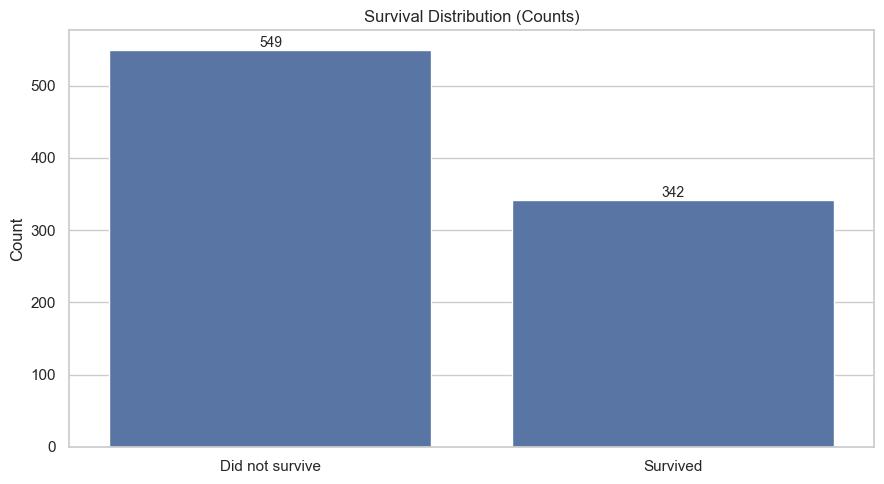

Overall survival rate: 0.384 (38.4%)


In [5]:
ax = sns.countplot(x="Survived", data=data)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Did not survive", "Survived"])
ax.set_title("Survival Distribution (Counts)")
ax.set_xlabel("")
ax.set_ylabel("Count")

# annotate counts
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center", va="bottom", fontsize=10
    )

plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "01_survival_counts.png"), dpi=200)
plt.show()

survival_rate = data["Survived"].mean()
print(f"Overall survival rate: {survival_rate:.3f} ({survival_rate*100:.1f}%)")


In [6]:
# function for bar plot to show survival rate by category

def survival_rate_barplot(df, col, title, order=None):
    ax = sns.barplot(x=col, y="Survived", data=df, order=order, errorbar=None)
    ax.set_title(title)
    ax.set_ylabel("Survival Probability")
    ax.set_xlabel(col)

    # annotate with %
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(f"{h*100:.1f}%", (p.get_x() + p.get_width()/2, h),
                    ha="center", va="bottom", fontsize=10)

    plt.tight_layout()
    return ax



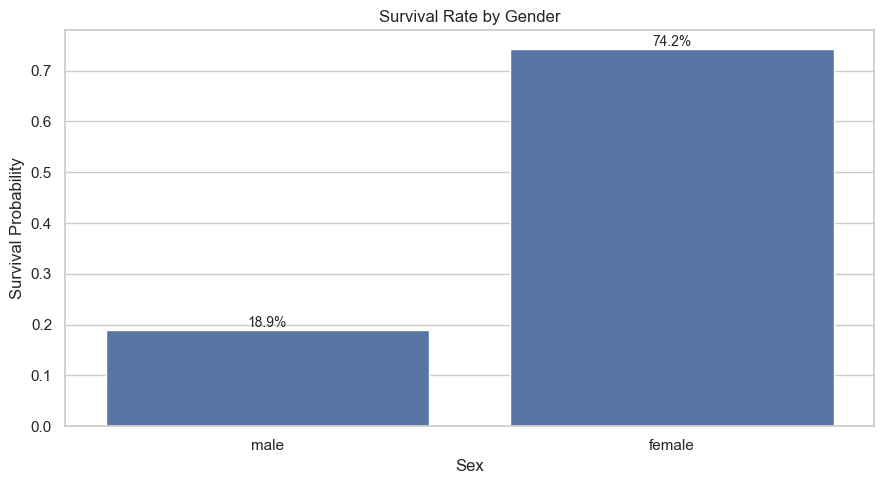

,survival_rate
Sex,
female,0.742038
male,0.188908


In [7]:
# rate of survival by gender

survival_rate_barplot(data, "Sex", "Survival Rate by Gender", order=["male", "female"])
plt.savefig(os.path.join(FIG_DIR, "02_survival_by_gender.png"), dpi=200)
plt.show()

display(data.groupby("Sex")["Survived"].mean().sort_values(ascending=False).to_frame("survival_rate"))

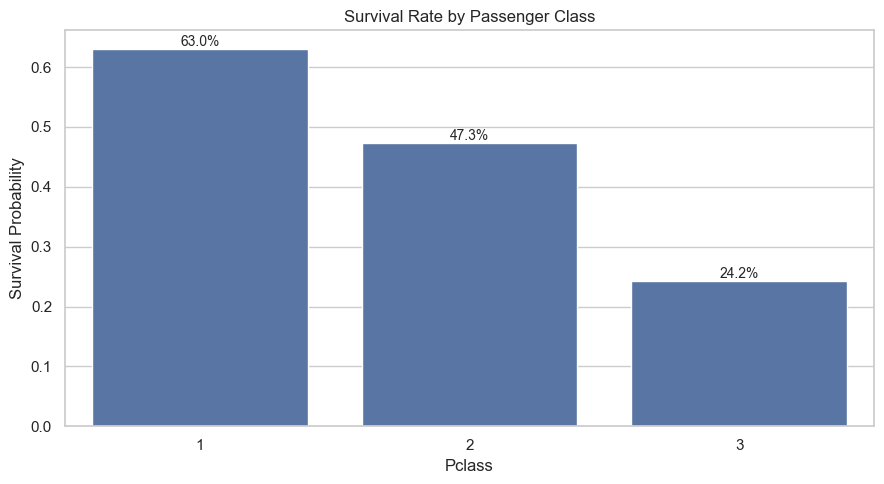

,survival_rate
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [8]:
# survival rate by passenger class

survival_rate_barplot(data, "Pclass", "Survival Rate by Passenger Class", order=[1, 2, 3])
plt.savefig(os.path.join(FIG_DIR, "03_survival_by_pclass.png"), dpi=200)
plt.show()

display(data.groupby("Pclass")["Survived"].mean().sort_values(ascending=False).to_frame("survival_rate"))


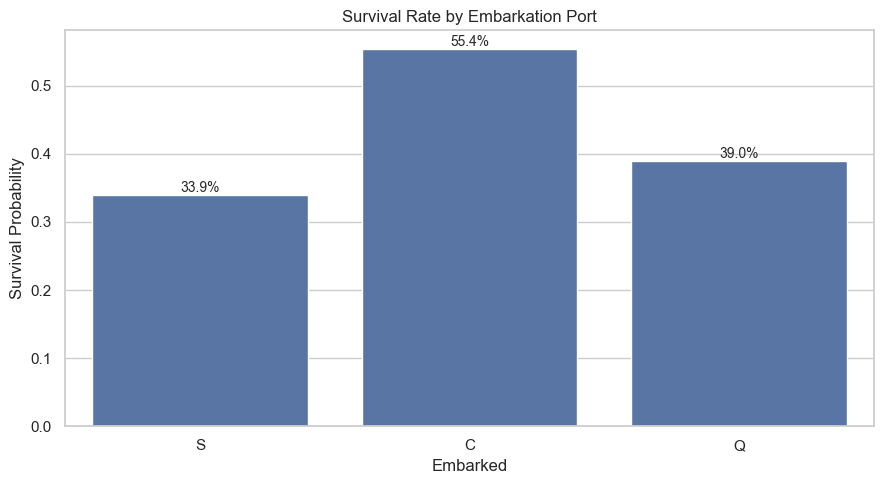

,survival_rate
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [9]:
# Additional survival rate by port embarked from

port_order = ["S", "C", "Q"]
existing_ports = [p for p in port_order if p in data["Embarked"].unique()]
survival_rate_barplot(data, "Embarked", "Survival Rate by Embarkation Port", order=existing_ports)
plt.savefig(os.path.join(FIG_DIR, "04_survival_by_embarked.png"), dpi=200)
plt.show()

display(data.groupby("Embarked")["Survived"].mean().sort_values(ascending=False).to_frame("survival_rate"))


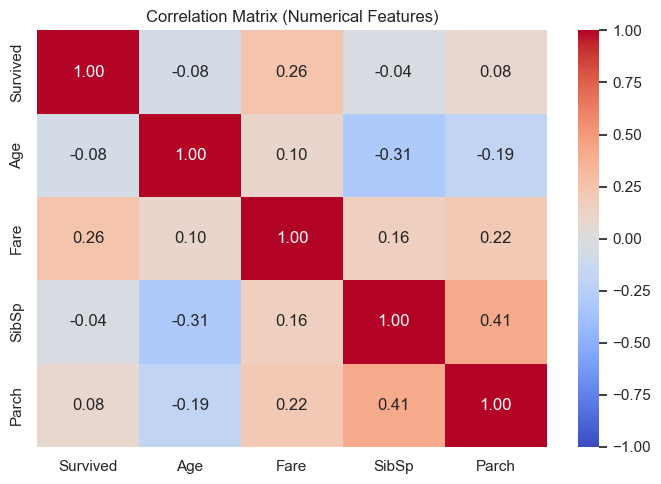

,Survived,Age,Fare,SibSp,Parch
Survived,1.000000,-0.077221,0.257307,-0.035322,0.081629
Age,-0.077221,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,-0.189119,0.216225,0.414838,1.000000


In [10]:
# Correlation matrix

num_cols = ["Survived", "Age", "Fare", "SibSp", "Parch"]
corr = data[num_cols].corr(numeric_only=True)

plt.figure(figsize=(7, 5))
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
ax.set_title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "05_corr_heatmap.png"), dpi=200)
plt.show()

corr


In [11]:
# Print all conclusions by data

# Simple “impact” summary: compare survival rates by groups
gender_rates = data.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
class_rates = data.groupby("Pclass")["Survived"].mean().sort_values(ascending=False)
port_rates = data.groupby("Embarked")["Survived"].mean().sort_values(ascending=False)

print("Key findings from dataset")
print(f"Overall survival rate: {data['Survived'].mean()*100:.1f}%\n")

print("Survival rate by gender:")
print((gender_rates * 100).round(1).astype(str) + "%", "\n")

print("Survival rate by passenger class:")
print((class_rates * 100).round(1).astype(str) + "%", "\n")

print("Survival rate by embarkation port:")
print((port_rates * 100).round(1).astype(str) + "%", "\n")

print("Correlation with Survived (numerical features):")
print(corr["Survived"].sort_values(ascending=False), "\n")

print("Conclusion:")
print("- Strongest factor: Gender (women survived much more, men prioritised safety of women and children).")
print("- Strong factor: Passenger class (1st > 2nd > 3rd) Higher the class, better the survival rate.")
print("- Fare is positively related to survival (wealth proxy).")
print("- Age has weaker effect (children slightly more likely to have survived).")
print("- SibSp/Parch show weak linear correlation; effects are non-linear (family size can help or hurt).")

Key findings from dataset
Overall survival rate: 38.4%

Survival rate by gender:
Sex
female    74.2%
male      18.9%
Name: Survived, dtype: str 

Survival rate by passenger class:
Pclass
1    63.0%
2    47.3%
3    24.2%
Name: Survived, dtype: str 

Survival rate by embarkation port:
Embarked
C    55.4%
Q    39.0%
S    33.9%
Name: Survived, dtype: str 

Correlation with Survived (numerical features):
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Name: Survived, dtype: float64 

Conclusion:
- Strongest factor: Gender (women survived much more, men prioritised safety of women and children).
- Strong factor: Passenger class (1st > 2nd > 3rd) Higher the class, better the survival rate.
- Fare is positively related to survival (wealth proxy).
- Age has weaker effect (children slightly more likely to have survived).
- SibSp/Parch show weak linear correlation; effects are non-linear (family size can help or hurt).
